In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [13]:
dataset = pd.read_csv("./creditcard.csv")

<Axes: >

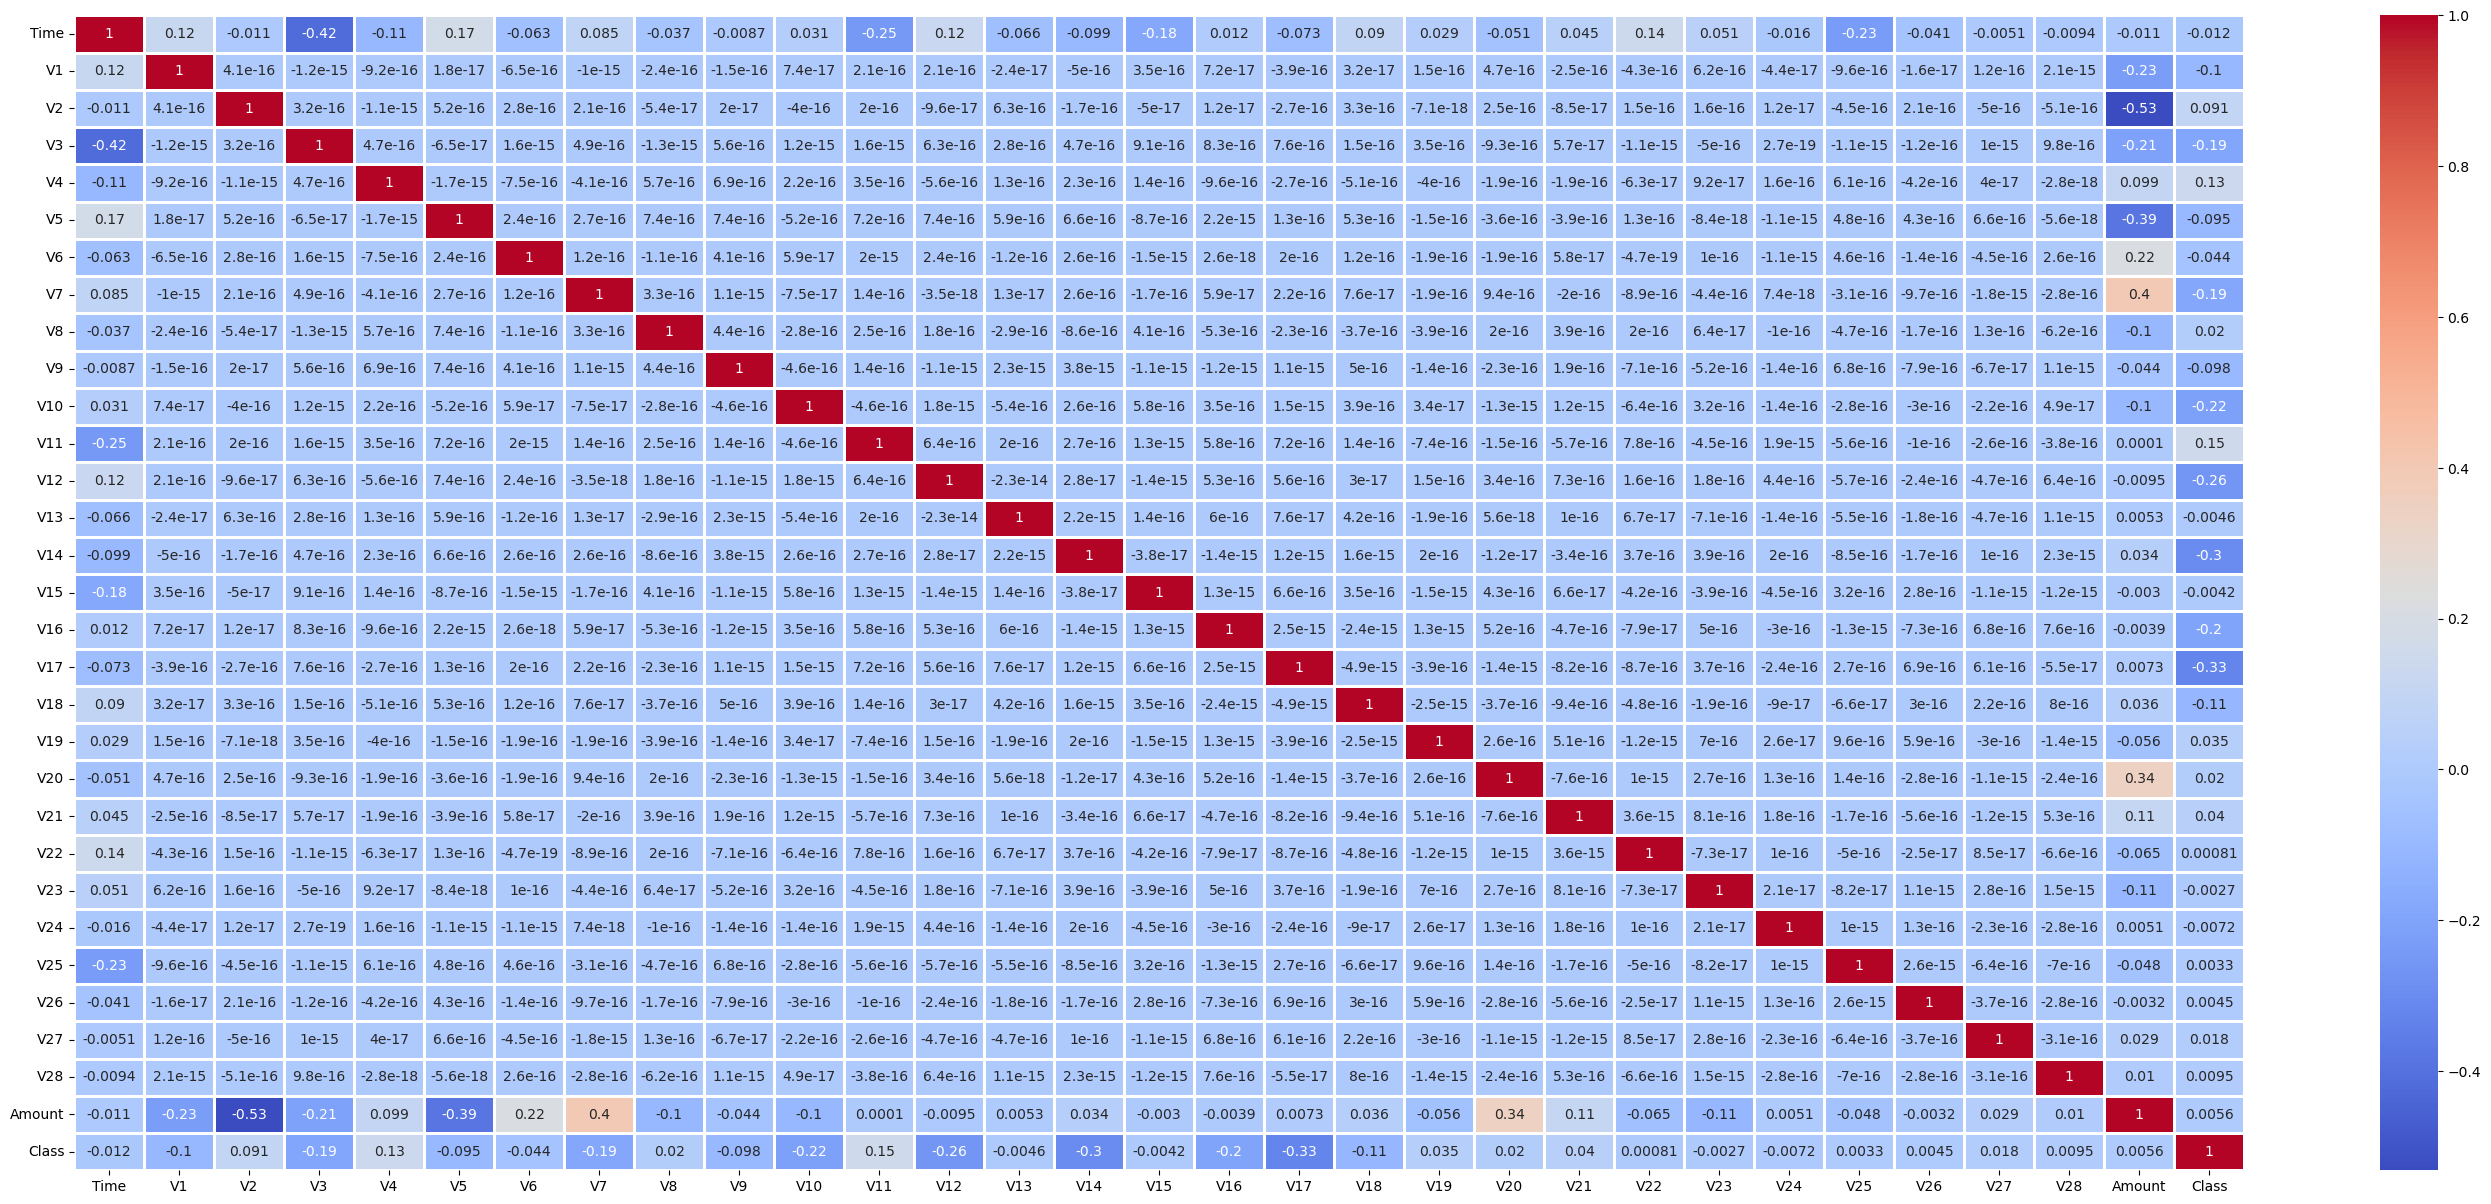

In [14]:
corr =  dataset.corr()
plt.figure(figsize = (35,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 2)

In [16]:
x = dataset.drop(columns = 'Class')
y = dataset['Class']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.998734,0.49789,0.786667,0.364198
